In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (16, 9)

In [8]:
df = pd.read_csv('airline-safety.csv')
df_num = df.drop(['airline'], axis=1)
X = scale(df_num)
X

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[-0.73249762, -0.47350489, -0.76834484, -0.77324402, -0.915809  ,
        -0.77641364, -0.5031789 ],
       [-0.12873725,  6.29271667,  4.16921547,  0.10723464,  0.41627682,
         0.3986989 ,  0.29439769],
       [-0.68780816, -0.10776318, -0.76834484, -0.77324402, -0.6937947 ,
        -0.77641364, -0.5031789 ],
       [-0.5424619 , -0.38206946, -0.41566196, -0.33300469,  0.19426252,
        -0.77641364, -0.5031789 ],
       [ 0.33097428, -0.47350489, -0.76834484, -0.77324402, -0.4717804 ,
        -0.77641364, -0.5031789 ],
       [ 1.11514219,  0.62372023,  0.64238667, -0.2298236 ,  0.41627682,
         1.57381143,  2.55117691],
       [-0.35489375, -0.47350489, -0.41566196,  1.48986128, -0.02775179,
         0.3986989 ,  0.92883362],
       [-0.46443892, -0.38206946, -0.76834484, -0.77324402,  0.19426252,
         0.3986989 , -0.43973531],
       [-0.28872181, -0.19919861, -0.76834484, -0.77324402,  0.19426252,
         0.3986989 ,  0.29439769],
       [-0.47281417, -0.0163

In [9]:
clustering = KMeans(n_clusters=3, random_state = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Clasificación K-Means')

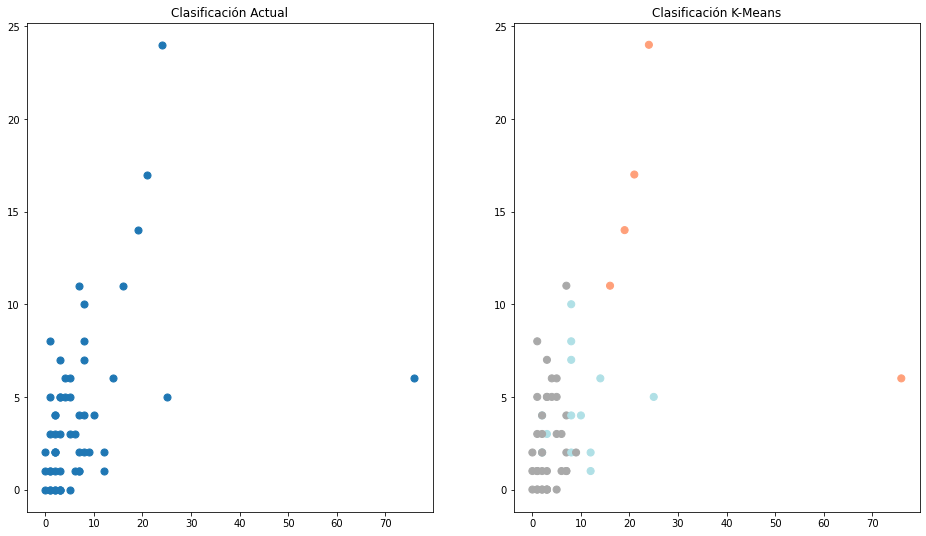

In [12]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])
plt.subplot (1,2,1)
plt.scatter(x=df_num.incidents_85_99, y=df_num.incidents_00_14, s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x=df_num.incidents_85_99, y=df_num.incidents_00_14, c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means") 

Text(0.5, 1.0, 'Clasificación K-Means')

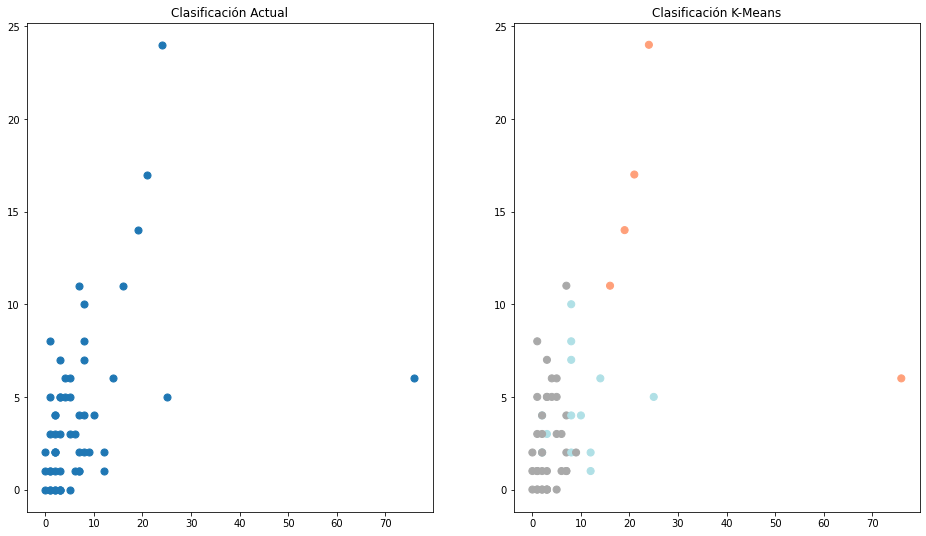

In [13]:
relabel = np.choose (clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot (1,2,1)
plt.scatter(x=df_num.incidents_85_99, y=df_num.incidents_00_14, s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x=df_num.incidents_85_99, y=df_num.incidents_00_14, c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means") 

In [ ]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

